In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Basic Plotting (Lines)

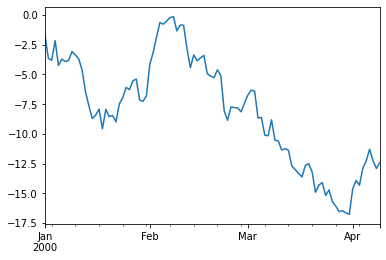

In [2]:
ts = pd.Series(np.random.randn(100), index=pd.date_range('1/1/2000', periods=100))
ts = ts.cumsum()

ts.plot()

<Figure size 432x288 with 0 Axes>

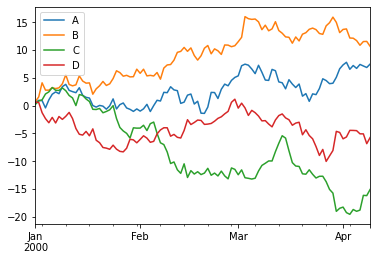

In [3]:
df = pd.DataFrame(np.random.randn(100, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()

plt.figure()

df.plot()

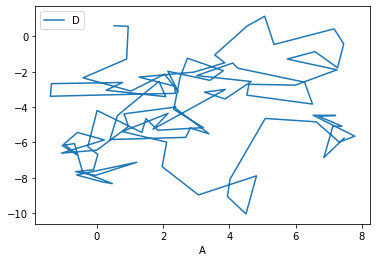

In [4]:
df.plot(x='A', y='D')

# 2. Bar Plots 

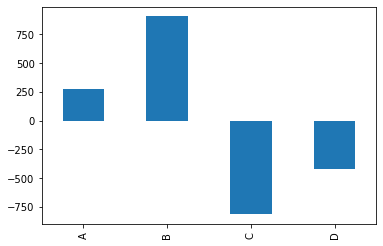

In [5]:
df.sum().plot.bar() #plotting a bar chart of the totals for each column

## Multiple bar plot (default)

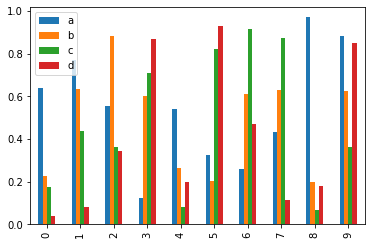

In [6]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

df2.plot.bar()

## Stacked bar plots

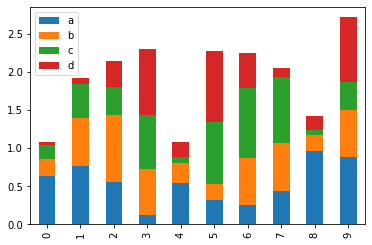

In [7]:
df2.plot.bar(stacked=True)

## Horizontal bar plots

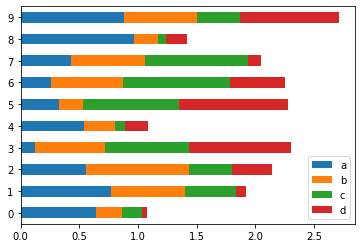

In [8]:
df2.plot.barh(stacked=True)

# 3. Histograms

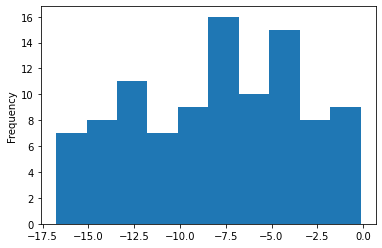

In [9]:
ts.plot.hist()

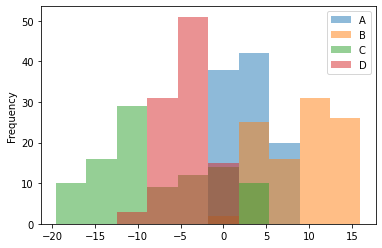

In [10]:
df.plot.hist(alpha=0.5)

## Stacked histograms

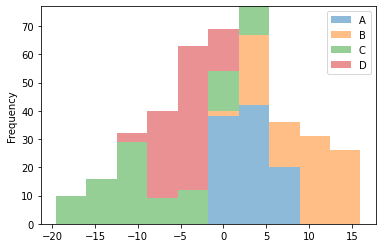

In [11]:
df.plot.hist(stacked=True, alpha=0.5)

## Cumulative histograms

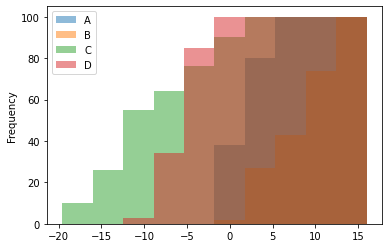

In [12]:
df.plot.hist(cumulative=True, alpha=0.5)

## Horizontal histograms

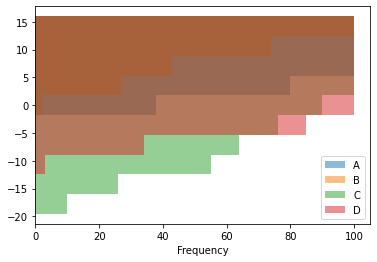

In [13]:
df.plot.hist(cumulative=True, orientation='horizontal', alpha=0.5)

## Multiple histogram subplots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7eff9b3bdcf8>,
      dtype=object)

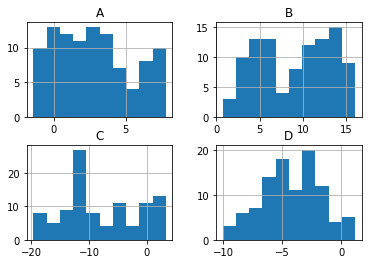

In [14]:
df.hist()

# 4. Box  plots

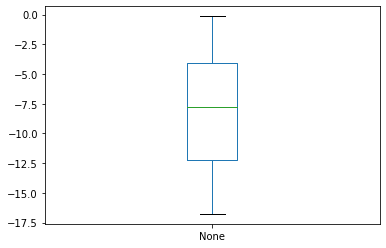

In [15]:
ts.plot.box()

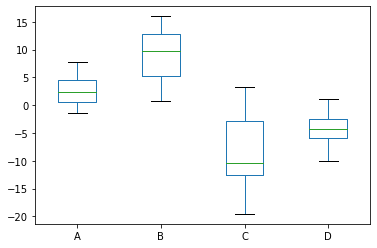

In [16]:
df.plot.box()

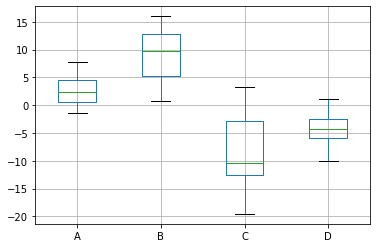

In [17]:
df.boxplot()

## Horizontal boxplots

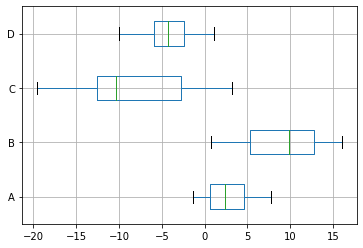

In [18]:
df.boxplot(vert=False)

# 5. Area plots

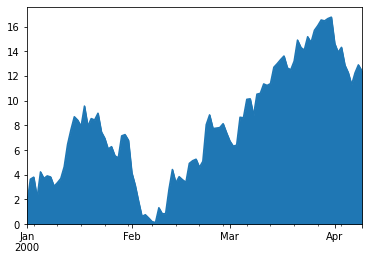

In [19]:
ts.abs().plot.area() # absolute values are used since for stacked area plots all values must be either +ve or -ve

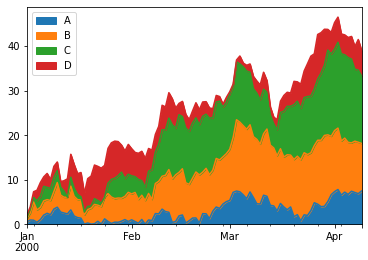

In [20]:
df.abs().plot.area()

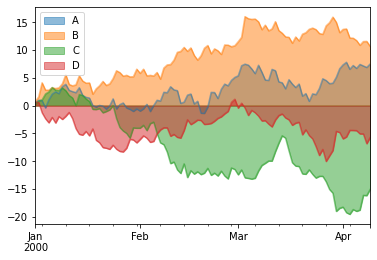

In [21]:
df.plot.area(stacked=False)

# 6. Scatter plots

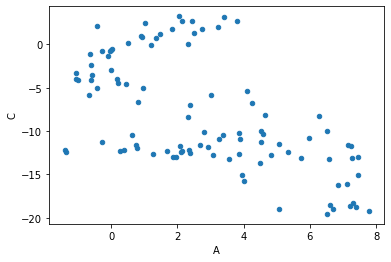

In [22]:
df.plot.scatter(x='A', y='C')

## Multiple column groups in same axes

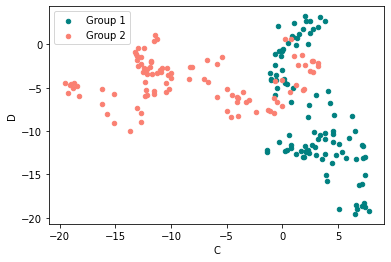

In [23]:
ax = df.plot.scatter(x='A', y='C', color='teal', label='Group 1');

df.plot.scatter(x='C', y='D', color='salmon', label='Group 2', ax=ax);

## Color scaling the points using a column

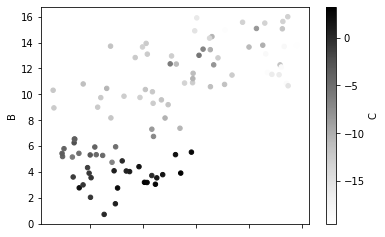

In [24]:
df.plot.scatter(x='A', y='B', c='C')

## Setting bubble size

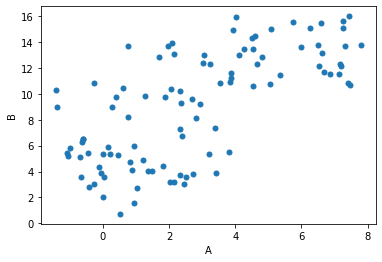

In [25]:
df.plot.scatter(x='A', y='B', s=25)

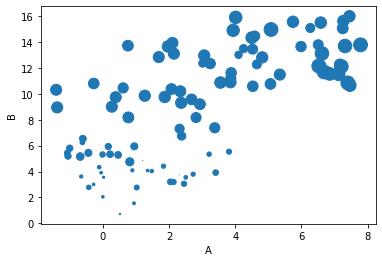

In [26]:
# using column C
df.plot.scatter(x='A', y='B', s=df['C'].abs()*10)

# 7. Hexagonal bin plots

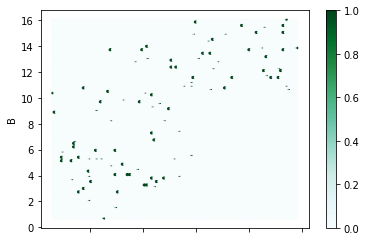

In [27]:
df.plot.hexbin(x='A', y='B')

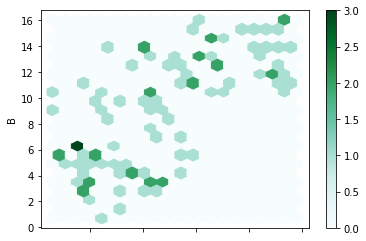

In [28]:
df.plot.hexbin(x='A', y='B', gridsize=20)

## Specifying alternate aggregating functions

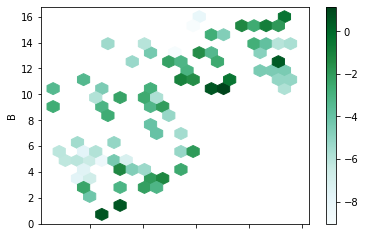

In [29]:
df.plot.hexbin(x='A', y='B', C='D', reduce_C_function=np.max, gridsize=20) # others include min, sum, mean, ...

# 8. Pie plots

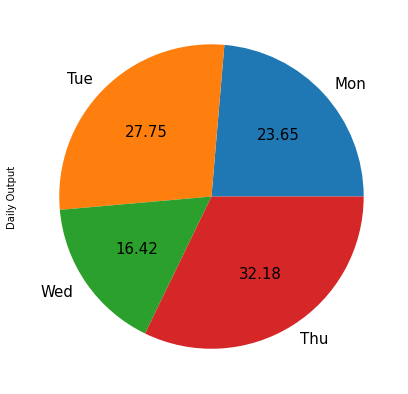

In [30]:
series = pd.Series([144, 169, 100, 196], index=['Mon', 'Tue', 'Wed', 'Thu'], name='Daily Output')

series.plot.pie(figsize=(7, 7), autopct='%.2f', fontsize=15)

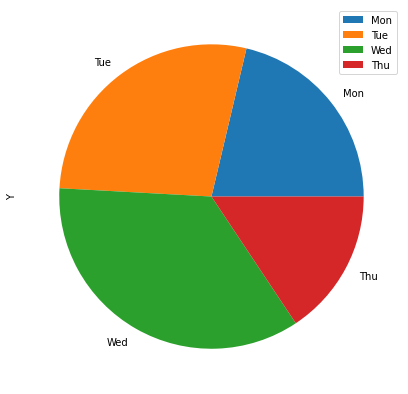

In [31]:
df2 = pd.DataFrame({ 'X':[144, 169, 100, 196], 'Y':[49, 64, 81, 36]}, index=['Mon', 'Tue', 'Wed', 'Thu'])

df2.plot.pie(y='Y', figsize=(7,7))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7eff9a8fbe80>,
      dtype=object)

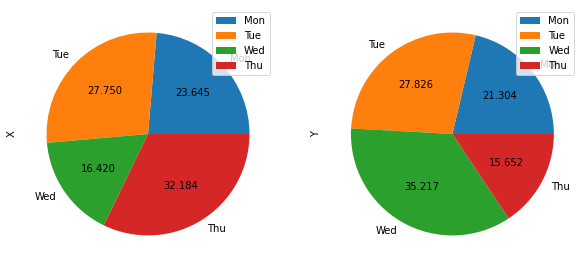

In [32]:
df2.plot.pie(subplots=True, figsize=(10,5), autopct='%.3f')

> **Note:** If you pass values whose sum total is less than 1.0, matplotlib draws an incomplete circle.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7eff9a844748>,
      dtype=object)

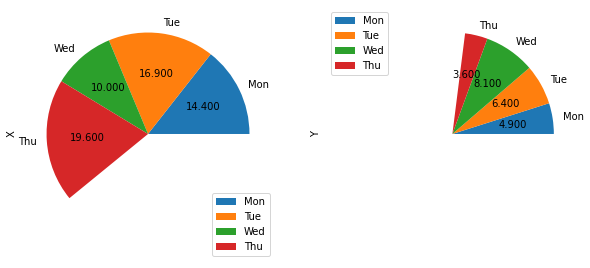

In [33]:
(df2/1000).plot.pie(subplots=True, figsize=(10,5), autopct='%.3f')